In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/task/23_linear_model/data/vehicles_dataset_prepared.csv')
df.head()

,id,price,price_category,is_audi,is_ford,is_chevrolet,is_toyota,x0_diesel,x0_electric,x0_gas,...,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std
0,7308295377,54990,high,0,0,0,0,1.0,0.0,0.0,...,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669,-0.615846,1.120284,-1.322394
1,7316380095,16942,medium,0,1,0,0,0.0,0.0,0.0,...,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799,1.623784,-1.374972,-0.695973
2,7313733749,35590,high,0,0,0,0,0.0,0.0,1.0,...,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930,-0.615846,-0.376870,-0.852578
3,7308210929,14500,medium,0,0,0,1,0.0,0.0,1.0,...,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810,-0.615846,1.120284,-0.226157
4,7303797340,14590,medium,0,0,0,0,0.0,0.0,0.0,...,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669,-0.615846,0.122182,-0.069552


In [ ]:
df_prepared = df.copy()
df_prepared = df_prepared.drop(['price_category', 'odometer/price_std', 'id'], axis=1)

x = df_prepared.drop(['price'], axis=1)
y = df_prepared['price']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3
)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
predicted_train = lr.predict(x_train)
predicted_test = lr.predict(x_test)

In [ ]:
print("Train loss: {0}".format(mean_absolute_error(y_train, predicted_train)))
print("Test loss: {0}".format(mean_absolute_error(y_test, predicted_test)))

Train loss: 3499.8043591266896
Test loss: 4070102187295.054


In [ ]:
col_none_koef = []
for col, i in zip(x.columns, lr.coef_):
   print(f'Коэффициент при колонке {col}={i}')
   if i == 0:
    col_none_koef.append(col)

In [ ]:
print(f"Название колонок с нулевым коеффициентом :{col_none_koef}")

Название колонок с нулевым коеффициентом :['manufacturer_ferrari']


In [ ]:
x2 = x.drop(col_none_koef, axis=1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(
    x2, y, test_size=0.3
)

In [ ]:
lr2 = LinearRegression()
lr2.fit(x_train2, y_train2)

LinearRegression()

In [ ]:
predicted_train2 = lr2.predict(x_train2)
predicted_test2 = lr2.predict(x_test2)

In [ ]:
print("Train loss: {0}".format(mean_absolute_error(y_train2, predicted_train2)))
print("Test loss: {0}".format(mean_absolute_error(y_test2, predicted_test2)))

Train loss: 3544.202640898363
Test loss: 4465.9233654018835


In [ ]:
df_prepared2 = df.copy()
df_prepared2 = df_prepared2.drop(['price', 'odometer/price_std', 'id'], axis=1)

x = df_prepared2.drop(['price_category'], axis=1)
y = df_prepared2['price_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
logr = LogisticRegression()
logr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predicted_train_log = logr.predict(x_train)
predicted_test_log = logr.predict(x_test)

In [ ]:
print("Train accuracy: {0}".format(accuracy_score(y_train, predicted_train_log)))
print("Test accuracy: {0}".format(accuracy_score(y_test, predicted_test_log)))

Train accuracy: 0.8551908510322294
Test accuracy: 0.7543312543312544


In [ ]:
def out_confusiom_matrix(y_predict_test, y_test):
  cm = confusion_matrix(y_pred = y_predict_test , y_true = y_test)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

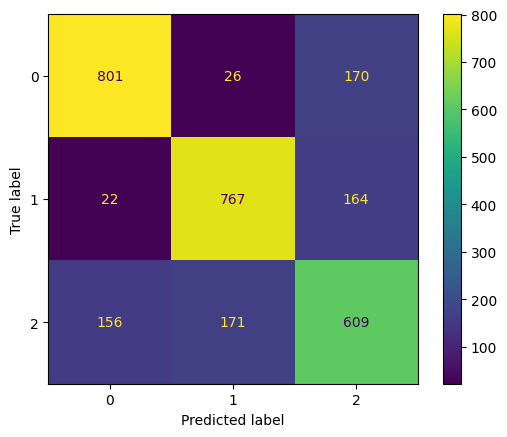

In [ ]:
out_confusiom_matrix(predicted_test_log, y_test)

In [ ]:
col_none_koef = []

for col, i in zip(x.columns, logr.coef_[0]):
   if i == 0:
    col_none_koef.append(col)
print(f"Название колонок с нулевым коеффициентом :{col_none_koef}")

Название колонок с нулевым коеффициентом :['short_model_124', 'short_model_1928', 'short_model_1977', 'short_model_1999', 'short_model_2000', 'short_model_2006', 'short_model_2015', 'short_model_2016', 'short_model_210', 'short_model_2500hd', 'short_model_3-window', 'short_model_323i', 'short_model_328ci', 'short_model_440xi', 'short_model_50', 'short_model_500x', 'short_model_525i', 'short_model_530i', 'short_model_535xi', 'short_model_545i', 'short_model_640', 'short_model_650xi', 'short_model_750i', 'short_model_944', 'short_model_Acuarea', 'short_model_Bentley', 'short_model_Champion', 'short_model_FORD*', 'short_model_FordE350', 'short_model_Frtlner', 'short_model_GCM', 'short_model_GEHL', 'short_model_GMX', 'short_model_GRAND', 'short_model_GULF', 'short_model_Hino', 'short_model_Hobda', 'short_model_INTERNATIONAL', 'short_model_Janesville', 'short_model_Jauguar', 'short_model_Jayco', 'short_model_MERDECES', 'short_model_MITUSBISHI', 'short_model_MV-1', 'short_model_Minin', 'shor

In [ ]:
x2 = x.drop(col_none_koef, axis=1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(
    x2, y, test_size=0.3
)

In [ ]:
logr2 = LogisticRegression(C=4.0, max_iter = 1000)
logr2.fit(x_train2, y_train2)

LogisticRegression(C=4.0, max_iter=1000)

In [ ]:
predicted_train_log2 = logr2.predict(x_train2)
predicted_test_log2 = logr2.predict(x_test2)

In [ ]:
print("Train accuracy: {0}".format(accuracy_score(y_train2, predicted_train_log2)))
print("Test accuracy: {0}".format(accuracy_score(y_test2, predicted_test_log2)))

Train accuracy: 0.8795484924996287
Test accuracy: 0.7550242550242551


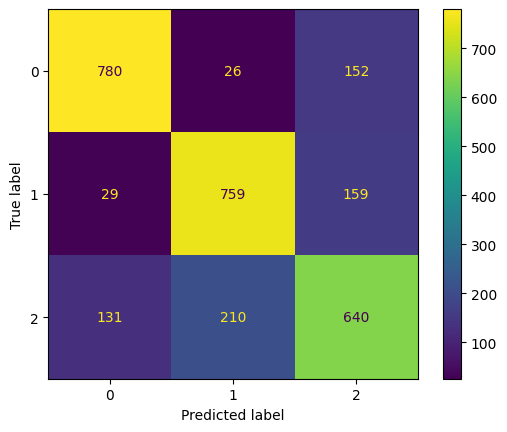

In [ ]:
out_confusiom_matrix(predicted_test_log2, y_test2)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = 32)
mlp.fit(x_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=32)

In [ ]:
predicted_train_mlp = mlp.predict(x_train2)
predicted_test_mlp = mlp.predict(x_test2)

In [ ]:
print("Train accuracy: {0}".format(accuracy_score(y_train2, predicted_train_mlp)))
print("Test accuracy: {0}".format(accuracy_score(y_test2, predicted_test_mlp)))

Train accuracy: 0.999702955591861
Test accuracy: 0.7674982674982676


In [ ]:
mlp2 = MLPClassifier(hidden_layer_sizes = 32, activation = "logistic")
mlp2.fit(x_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=32)

In [ ]:
predicted_train_mlp2 = mlp2.predict(x_train2)
predicted_test_mlp2 = mlp2.predict(x_test2)

In [ ]:
print("Train accuracy: {0}".format(accuracy_score(y_train2, predicted_train_mlp2)))
print("Test accuracy: {0}".format(accuracy_score(y_test2, predicted_test_mlp2)))

Train accuracy: 0.9273726422100104
Test accuracy: 0.7841302841302842


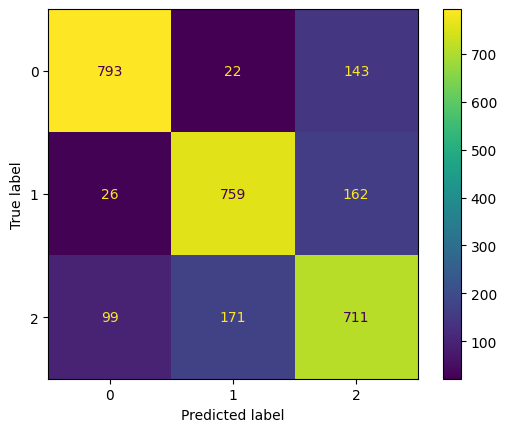

In [ ]:
out_confusiom_matrix(predicted_test_mlp2, y_test2)

In [ ]:
rf_clf = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=500)
rf_clf.fit(x_train2, y_train2)

RandomForestClassifier(max_features='log2', n_estimators=500)

In [ ]:
predicted_train_rf = rf_clf.predict(x_train2)
predicted_test_rf = rf_clf.predict(x_test2)

In [ ]:
print("Train accuracy: {0}".format(accuracy_score(y_train2, predicted_train_rf)))
print("Test accuracy: {0}".format(accuracy_score(y_test2, predicted_test_rf)))

Train accuracy: 1.0
Test accuracy: 0.7525987525987526


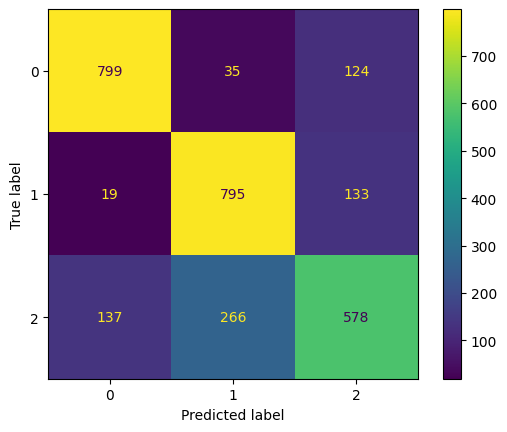

In [ ]:
out_confusiom_matrix(predicted_test_rf, y_test2)

In [ ]:
pred = {"pred_logr" : predicted_test_log2, "pred_mlp" :predicted_test_mlp2, "pred_rf" : predicted_test_rf }

In [ ]:
pred_df = pd.DataFrame(pred)

pred_df.head()

,pred_logr,pred_mlp,pred_rf
0,high,high,high
1,low,low,low
2,medium,medium,medium
3,high,high,high
4,medium,low,low


In [ ]:
pred_df["target"] = pred_df.apply(lambda row: row.mode()[0], axis = 1)

In [ ]:
pred_df

,pred_logr,pred_mlp,pred_rf,target
0,high,high,high,high
1,low,low,low,low
2,medium,medium,medium,medium
3,high,high,high,high
4,medium,low,low,low
...,...,...,...,...
2881,high,high,high,high
2882,low,low,medium,low
2883,medium,medium,medium,medium
2884,high,medium,low,high


In [ ]:
print("Test accuracy: {0}".format(accuracy_score(y_test2, pred_df["target"])))

Test accuracy: 0.7737352737352737
